# <font size='10' color='#1ABC9C'> Feature Engineering </font>

1. Handling Missing Values
2. Categorical Variables : remove rare values
3. Standardize the values of the variables to the same range     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('IncomeData.csv')

##What's the shape of data set
print(dataset.shape)

(4508, 13)


In [3]:
## What are the Top 5 records
dataset.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
0,45,6,1,4,17,0.371518,1.294482,0,4,1,22,1,9.1
1,67,6,1,15,12,0.375552,0.392448,0,3,1,28,1,5.9
2,68,6,1,7,9,0.200970,0.789030,0,5,0,21,1,5.8
3,75,6,1,35,16,0.314096,0.757904,0,4,0,11,1,5.8
4,38,7,1,8,37,0.143190,0.411810,0,3,0,11,1,22.1


## Spliting the Dataset into Training Data and Test Data

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,dataset['income'], test_size = 0.3,random_state=31) 


In [5]:
X_train.shape ,  X_test.shape

((3155, 13), (1353, 13))

## Check for Missing Values - X_train

In [6]:
## What percentage of Missing Values are there in the each feature

## Create a List of all features with missing values
features_miss_val=[features for features in X_train.columns if X_train[features].isnull().sum()>1] 
print(features_miss_val)

[]


no missing values in the training data set.

## <font size = 8  color='#F1C40F'>Transforming the Skewed Distributions - X_train</font>

### For continuous numerical features
creddebt- Continuous and Numeric Data

othdebt - Continuous and Numeric Data

carvalue- Continuous and Numeric Data

Income - Continuous and Dependent Variable

In [7]:
X_train.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
1727,79,13,2,34,16,0.376672,0.887328,0,4,0,44,2,8.5
880,25,18,4,0,36,4.130604,2.313396,1,2,1,4,1,23.4
983,34,19,4,3,62,1.777912,4.856088,1,2,1,8,1,21.2
2380,65,17,4,23,21,0.926877,1.194123,0,4,0,12,2,9.8
788,29,17,4,3,13,0.256360,0.627640,0,3,1,6,1,5.1


In [8]:
num_features = ['creddebt','othdebt','carvalue','income']

for feature in num_features:
    X_train[feature] = np.log(X_train[feature])
X_train.head()

C:\Users\offic\AppData\Local\Temp/ipykernel_7300/1857831683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = np.log(X_train[feature])


,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
1727,79,13,2,34,2.772589,-0.976380,-0.119541,0,4,0,44,2,2.140066
880,25,18,4,0,3.583519,1.418424,0.838717,1,2,1,4,1,3.152736
983,34,19,4,3,4.127134,0.575440,1.580233,1,2,1,8,1,3.054001
2380,65,17,4,23,3.044522,-0.075934,0.177412,0,4,0,12,2,2.282382
788,29,17,4,3,2.564949,-1.361173,-0.465789,0,3,1,6,1,1.629241


output after transformation

### Handling Rare Categorical Features - X_train
we need to remove those categorical variables that tend to occur less than 1% of the observation

edcat - Categorical Data

default - Categorical Data

jobsat - Categorical Data

homeown - Categorical Data

In [9]:
categ_features = [feature for feature in X_train.columns if 'edcat' in feature or 'default' in feature or 'jobsat' in feature or 'homeown' in feature]
print(categ_features)

['edcat', 'default', 'jobsat', 'homeown']


In [10]:
# finding the rarity of variable in categorcal feature

for feature in categ_features:
    percent_rarity=X_train.groupby(feature)['income'].count()/len(X_train)
    temp_df=percent_rarity[percent_rarity>0.01].index
    X_train[feature]= np.where(X_train[feature].isin(temp_df),X_train[feature],'Rare_Var')

X_train.head(300)

rare_value_edcat = [value for value in X_train['edcat'].values if 'Rare_Var' in value]
print(rare_value_edcat)


rare_value_default = [value for value in X_train['default'].values if 'Rare_Var' in value]
print(rare_value_default)


rare_value_jobsat = [value for value in X_train['jobsat'].values if 'Rare_Var' in value]
print(rare_value_jobsat)


rare_value_homeown = [value for value in X_train['homeown'].values if 'Rare_Var' in value]
print(rare_value_homeown)


[]
[]
[]
[]


C:\Users\offic\AppData\Local\Temp/ipykernel_7300/3810733446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature]= np.where(X_train[feature].isin(temp_df),X_train[feature],'Rare_Var')


It seems we don't have any rare value in the training dataset

### Feature Scaling - X-Train
We need to do feature scaling because we have different feature measured with different units 
hence its good to do scaling before proceeding to apply machine learnign Algorithm.
#### Helps in applying M.L. Algo in a better way
###### Remember scaling is not applied on the Dependent Variable (income) and categorical Variables

In [11]:
X_train_copy = X_train.copy()
scale_feature = [feature for feature in X_train.columns if feature not in ['income'] and feature not in categ_features]
print(scale_feature)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train[scale_feature])

['age', 'yrsed', 'yrsempl', 'creddebt', 'othdebt', 'address', 'cars', 'carvalue']


MinMaxScaler()

In [12]:
X_train_copy.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
1727,79,13,2,34,2.772589,-0.976380,-0.119541,0,4,0,44,2,2.140066
880,25,18,4,0,3.583519,1.418424,0.838717,1,2,1,4,1,3.152736
983,34,19,4,3,4.127134,0.575440,1.580233,1,2,1,8,1,3.054001
2380,65,17,4,23,3.044522,-0.075934,0.177412,0,4,0,12,2,2.282382
788,29,17,4,3,2.564949,-1.361173,-0.465789,0,3,1,6,1,1.629241


In [13]:
##  we again put all columns together after performing the scaling on Descrete Numeric Variables we get a  datset of income and all scaled descrete numerical variables. 
X_train = pd.concat([X_train['income'].reset_index(drop=True),pd.DataFrame(scaler.transform(X_train[scale_feature]),columns=scale_feature)],axis=1)

In [14]:
X_train.head()



,income,age,yrsed,yrsempl,creddebt,othdebt,address,cars,carvalue
0,2.772589,1.000000,0.411765,0.653846,0.475553,0.424034,0.771930,0.166667,0.354501
1,3.583519,0.114754,0.705882,0.000000,0.717623,0.532861,0.070175,0.000000,0.620105
2,4.127134,0.262295,0.764706,0.057692,0.632413,0.617074,0.140351,0.000000,0.594209
3,3.044522,0.770492,0.647059,0.442308,0.566571,0.457758,0.210526,0.166667,0.391828
4,2.564949,0.180328,0.647059,0.057692,0.436658,0.384711,0.105263,0.000000,0.220521


In [15]:
X_train_copy.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
1727,79,13,2,34,2.772589,-0.976380,-0.119541,0,4,0,44,2,2.140066
880,25,18,4,0,3.583519,1.418424,0.838717,1,2,1,4,1,3.152736
983,34,19,4,3,4.127134,0.575440,1.580233,1,2,1,8,1,3.054001
2380,65,17,4,23,3.044522,-0.075934,0.177412,0,4,0,12,2,2.282382
788,29,17,4,3,2.564949,-1.361173,-0.465789,0,3,1,6,1,1.629241


###### we again put all columns together after performing the scaling on Descrete Numeric Variables we get a  datset variables.

In [16]:
X_train.reset_index(drop=True, inplace=True)
X_train_copy.reset_index(drop=True, inplace=True)

In [17]:
X_train = pd.concat([X_train,X_train_copy[categ_features]],axis=1)
#Final X_train after scaling the Descrete Numeric Varialbe ,except Dependent and Categorical Variables.
X_train.head()

,income,age,yrsed,yrsempl,creddebt,othdebt,address,cars,carvalue,edcat,default,jobsat,homeown
0,2.772589,1.000000,0.411765,0.653846,0.475553,0.424034,0.771930,0.166667,0.354501,2,0,4,0
1,3.583519,0.114754,0.705882,0.000000,0.717623,0.532861,0.070175,0.000000,0.620105,4,1,2,1
2,4.127134,0.262295,0.764706,0.057692,0.632413,0.617074,0.140351,0.000000,0.594209,4,1,2,1
3,3.044522,0.770492,0.647059,0.442308,0.566571,0.457758,0.210526,0.166667,0.391828,4,0,4,0
4,2.564949,0.180328,0.647059,0.057692,0.436658,0.384711,0.105263,0.000000,0.220521,4,0,3,1


In [18]:
X_train.dtypes

income      float64
age         float64
yrsed       float64
yrsempl     float64
creddebt    float64
othdebt     float64
address     float64
cars        float64
carvalue    float64
edcat        object
default      object
jobsat       object
homeown      object
dtype: object

##### Now we need to Handle Categorical Independent Variables 

In [19]:
# Home Own  - Have Binary Value, hence no encoding is required



In [20]:
# Jobsat - Have Ordinal Values , hence Ordinal encoding is to be used 
## Already Encoded .


In [21]:
# default -  Have Binary Value, hence no encoding is required

In [22]:
#edcat - Have simple categorical data , hence one-hot encoding is used

temp = pd.get_dummies(X_train['edcat'],drop_first=True)
X_train = pd.concat([X_train , temp],axis=1)
X_train.rename(columns = {'2':'edcat2'}, inplace = True)
X_train.rename(columns = {'3':'edcat3'}, inplace = True)
X_train.rename(columns = {'4':'edcat4'}, inplace = True)
X_train.rename(columns = {'5':'edcat5'}, inplace = True)

X_train.head()

,income,age,yrsed,yrsempl,creddebt,othdebt,address,cars,carvalue,edcat,default,jobsat,homeown,edcat2,edcat3,edcat4,edcat5
0,2.772589,1.000000,0.411765,0.653846,0.475553,0.424034,0.771930,0.166667,0.354501,2,0,4,0,1,0,0,0
1,3.583519,0.114754,0.705882,0.000000,0.717623,0.532861,0.070175,0.000000,0.620105,4,1,2,1,0,0,1,0
2,4.127134,0.262295,0.764706,0.057692,0.632413,0.617074,0.140351,0.000000,0.594209,4,1,2,1,0,0,1,0
3,3.044522,0.770492,0.647059,0.442308,0.566571,0.457758,0.210526,0.166667,0.391828,4,0,4,0,0,0,1,0
4,2.564949,0.180328,0.647059,0.057692,0.436658,0.384711,0.105263,0.000000,0.220521,4,0,3,1,0,0,1,0


In [23]:
# Finally saving the final Feature engineered X_train dataset.
X_train.to_csv('X_train.csv',index=False)


### <font color = "Red">We need to do same steps for test data also</font>

## Check for Missing Values - X_test

In [24]:
## What percentage of Missing Values are there in the each feature

## Create a List of all features with missing values
features_miss_val=[features for features in X_test.columns if X_test[features].isnull().sum()>1] 
print(features_miss_val)

[]


## <font size = 8  color='#F1C40F'>Transforming the Skewed Distributions - X_test</font>

### For continuous numerical features
creddebt- Continuous and Numeric Data

othdebt - Continuous and Numeric Data

carvalue- Continuous and Numeric Data

Income - Continuous and Dependent Variable

In [25]:
X_test.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
2022,46,15,3,11,88,0.662200,2.417800,0,4,1,18,2,46.1
1139,53,8,1,14,40,0.211680,0.268320,0,2,1,18,2,15.5
595,33,15,3,6,49,1.207360,2.565640,0,2,1,11,1,25.7
1420,20,12,2,1,18,1.245888,0.608112,1,1,0,0,2,7.5
2486,67,18,4,5,52,0.989976,4.938024,1,1,0,26,2,23.1


In [26]:
num_features = ['creddebt','othdebt','carvalue','income']

for feature in num_features:
    X_test[feature] = np.log(X_test[feature])
X_test.head()

C:\Users\offic\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\offic\AppData\Local\Temp/ipykernel_7300/1302567761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = np.log(X_test[feature])


,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
2022,46,15,3,11,4.477337,-0.412188,0.882858,0,4,1,18,2,3.830813
1139,53,8,1,14,3.688879,-1.552680,-1.315575,0,2,1,18,2,2.740840
595,33,15,3,6,3.891820,0.188436,0.942208,0,2,1,11,1,3.246491
1420,20,12,2,1,2.890372,0.219849,-0.497396,1,1,0,0,2,2.014903
2486,67,18,4,5,3.951244,-0.010075,1.596965,1,1,0,26,2,3.139833


output after transformation

### Handling Rare Categorical Features - X_test
we need to remove those categorical variables that tend to occur less than 1% of the observation

edcat - Categorical Data

default - Categorical Data

jobsat - Categorical Data

homeown - Categorical Data

In [27]:
categ_features = [feature for feature in X_test.columns if 'edcat' in feature or 'default' in feature or 'jobsat' in feature or 'homeown' in feature]
print(categ_features)

['edcat', 'default', 'jobsat', 'homeown']


In [28]:
# finding the rarity of variable in categorcal feature

for feature in categ_features:
    percent_rarity=X_test.groupby(feature)['income'].count()/len(X_test)
    temp_df=percent_rarity[percent_rarity>0.01].index
    X_test[feature]= np.where(X_test[feature].isin(temp_df),X_test[feature],'Rare_Var')

rare_value_edcat = [value for value in X_test['edcat'].values if 'Rare_Var' in value]
print(rare_value_edcat)


rare_value_default = [value for value in X_test['default'].values if 'Rare_Var' in value]
print(rare_value_default)


rare_value_jobsat = [value for value in X_test['jobsat'].values if 'Rare_Var' in value]
print(rare_value_jobsat)


rare_value_homeown = [value for value in X_test['homeown'].values if 'Rare_Var' in value]
print(rare_value_homeown)


[]
[]
[]
[]


C:\Users\offic\AppData\Local\Temp/ipykernel_7300/226651975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature]= np.where(X_test[feature].isin(temp_df),X_test[feature],'Rare_Var')


### Feature Scaling - X-Test
We need to do feature scaling because we have different feature measured with different units 
hence its good to do scaling before proceeding to apply machine learnign Algorithm.
#### Helps in applying M.L. Algo in a better way
###### Remember scaling is not applied on the Dependent Variable (income)

In [29]:
##### checking for infinity
  
temp = X_test.isin([np.inf, -np.inf])
print(temp)

#### printing the count of infinity values")
  
count = np.isinf(temp).values.sum()
print("It contains " + str(count) + " infinite values")

count = np.isnan(temp).values.sum()
print("It contains " + str(count) + " nan values")

X_test.dtypes

        age  yrsed  edcat  yrsempl  income  creddebt  othdebt  default  \
2022  False  False  False    False   False     False    False    False   
1139  False  False  False    False   False     False    False    False   
595   False  False  False    False   False     False    False    False   
1420  False  False  False    False   False     False    False    False   
2486  False  False  False    False   False     False    False    False   
...     ...    ...    ...      ...     ...       ...      ...      ...   
483   False  False  False    False   False     False    False    False   
1600  False  False  False    False   False     False    False    False   
3505  False  False  False    False   False     False    False    False   
2350  False  False  False    False   False     False    False    False   
4417  False  False  False    False   False     False    False    False   

      jobsat  homeown  address   cars  carvalue  
2022   False    False    False  False     False  
1139   Fals

age           int64
yrsed         int64
edcat        object
yrsempl       int64
income      float64
creddebt    float64
othdebt     float64
default      object
jobsat       object
homeown      object
address       int64
cars          int64
carvalue    float64
dtype: object

In [30]:
X_test_copy = X_test.copy()
scale_feature = [feature for feature in X_test.columns if feature not in ['income'] and feature not in categ_features]
print(scale_feature)
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()

#this line helps to solve the Value error of infinte and large for float 62
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
scaler2.fit(X_test[scale_feature])



['age', 'yrsed', 'yrsempl', 'creddebt', 'othdebt', 'address', 'cars', 'carvalue']


MinMaxScaler()

In [31]:
X_test_copy.head()

,age,yrsed,edcat,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
2022,46,15,3,11,4.477337,-0.412188,0.882858,0,4,1,18,2,3.830813
1139,53,8,1,14,3.688879,-1.552680,-1.315575,0,2,1,18,2,2.740840
595,33,15,3,6,3.891820,0.188436,0.942208,0,2,1,11,1,3.246491
1420,20,12,2,1,2.890372,0.219849,-0.497396,1,1,0,0,2,2.014903
2486,67,18,4,5,3.951244,-0.010075,1.596965,1,1,0,26,2,3.139833


In [32]:
X_test = pd.concat([X_test['income'].reset_index(drop=True),pd.DataFrame(scaler.transform(X_test[scale_feature]),columns=scale_feature)],axis=1)

X_test.reset_index(drop=True, inplace=True)
X_test_copy.reset_index(drop=True, inplace=True)

X_test = pd.concat([X_test , X_test_copy[categ_features]],axis=1)

In [33]:
X_test.head()

,income,age,yrsed,yrsempl,creddebt,othdebt,address,cars,carvalue,edcat,default,jobsat,homeown
0,4.477337,0.459016,0.529412,0.211538,0.532582,0.537874,0.315789,0.166667,0.797952,3,0,4,1
1,3.688879,0.573770,0.117647,0.269231,0.417300,0.288202,0.315789,0.166667,0.512073,1,0,2,1
2,3.891820,0.245902,0.529412,0.115385,0.593294,0.544614,0.192982,0.000000,0.644696,3,0,2,1
3,2.890372,0.032787,0.352941,0.019231,0.596469,0.381121,0.000000,0.166667,0.321673,2,1,1,0
4,3.951244,0.803279,0.705882,0.096154,0.573228,0.618974,0.456140,0.166667,0.616721,4,1,1,0


In [34]:
#edcat - Have simple categorical data , hence one-hot encoding is used

temp = pd.get_dummies(X_test['edcat'],drop_first=True)
X_test = pd.concat([X_test , temp],axis=1)
X_test.rename(columns = {'2':'edcat2'}, inplace = True)
X_test.rename(columns = {'3':'edcat3'}, inplace = True)
X_test.rename(columns = {'4':'edcat4'}, inplace = True)
X_test.rename(columns = {'5':'edcat5'}, inplace = True)

X_test.head()

,income,age,yrsed,yrsempl,creddebt,othdebt,address,cars,carvalue,edcat,default,jobsat,homeown,edcat2,edcat3,edcat4,edcat5
0,4.477337,0.459016,0.529412,0.211538,0.532582,0.537874,0.315789,0.166667,0.797952,3,0,4,1,0,1,0,0
1,3.688879,0.573770,0.117647,0.269231,0.417300,0.288202,0.315789,0.166667,0.512073,1,0,2,1,0,0,0,0
2,3.891820,0.245902,0.529412,0.115385,0.593294,0.544614,0.192982,0.000000,0.644696,3,0,2,1,0,1,0,0
3,2.890372,0.032787,0.352941,0.019231,0.596469,0.381121,0.000000,0.166667,0.321673,2,1,1,0,1,0,0,0
4,3.951244,0.803279,0.705882,0.096154,0.573228,0.618974,0.456140,0.166667,0.616721,4,1,1,0,0,0,1,0


In [35]:
X_test.to_csv('X_test.csv',index=False)

###  Time to remove the outliers , as after transformation we still have outliers , then I'll remove them if there count is less than 5% of the total rows

In [36]:
X_train_data = pd.read_csv('X_train.csv')
X_train = X_train_data.copy()
X_train.shape

(3155, 17)

Removing outliers Continuous variables (after scaling descrete features also became continuous)

1. income
2. creddebt
3. othdebt
4. carvalue
5. age
6. yrsed
7. yrsempl
8. address
9. cars


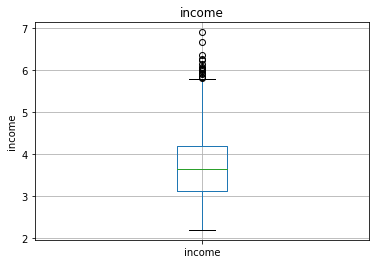

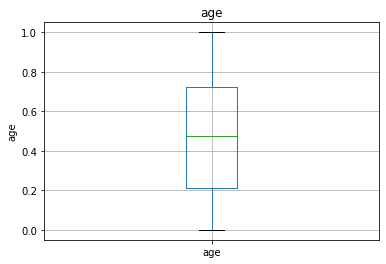

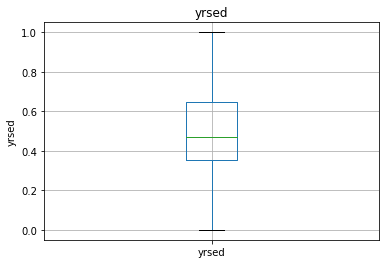

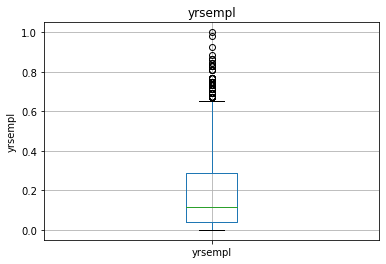

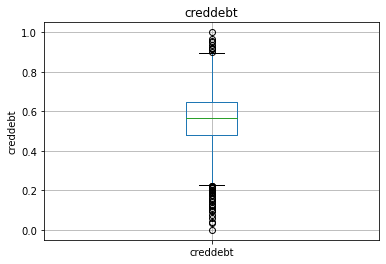

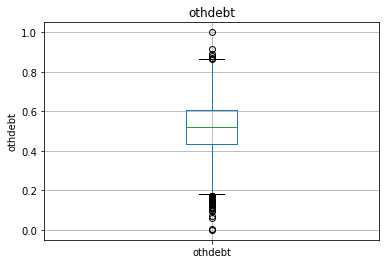

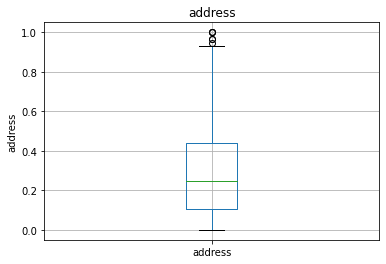

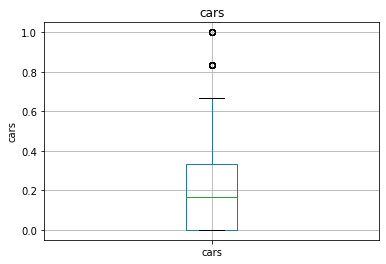

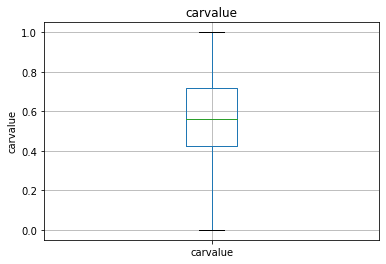

In [37]:
#ploting boxplots to visualize outliers
conti_features = (feature for feature in X_train 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


## outcome  : -
        1. Income :- outliers above 3rd Quartile
        2. age :- No outliers ### 
        3. yrsed :-  No outliers ### 
        4. yrsempl :- outliers above 3rd Quartile
        5. creddebt :- outliers above 3rd Quartile and below 1st Quartile
        4. othdebt :- outliers above 3rd Quartile and below 1st Quartile
        5. address :-   outliers above 3rd Quartile
        6. cars :- outliers above 3rd Quartile
        7. carvalue :- No outliers ### 
        

### Removing Outliers from income 



In [38]:
Q1 = X_train['income'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_train['income'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1


In [39]:
outliers=((X_train['income'] < (Q1 - 1.5 * IQR)) | (X_train['income'] > (Q3 + 1.5 * IQR)))
outliers.sum()

17

In [40]:
### changing the outliers to nan ,then removing the nan(s)
X_train['income'][outliers]  = np.nan
X_train = X_train.dropna()

C:\Users\offic\AppData\Local\Temp/ipykernel_7300/707814323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['income'][outliers]  = np.nan


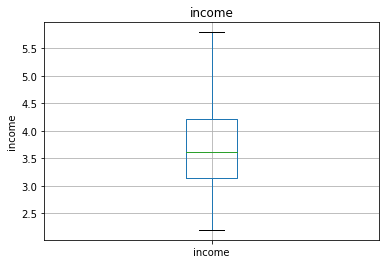

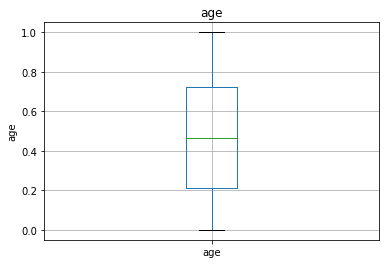

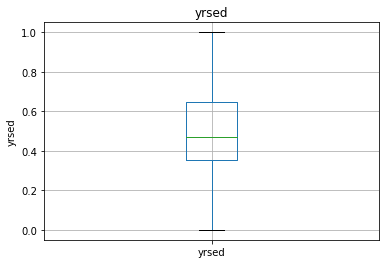

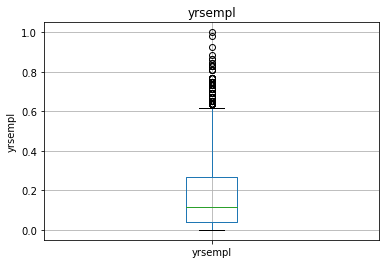

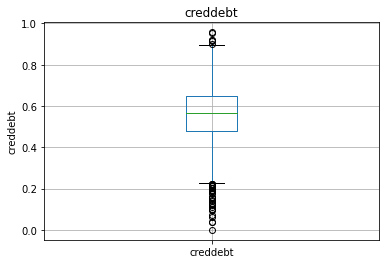

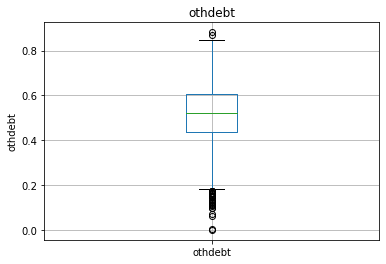

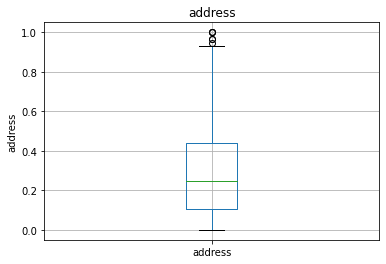

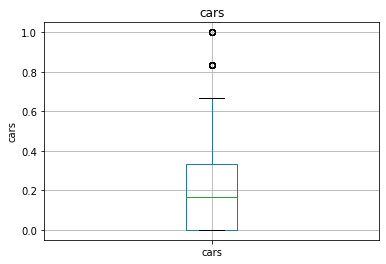

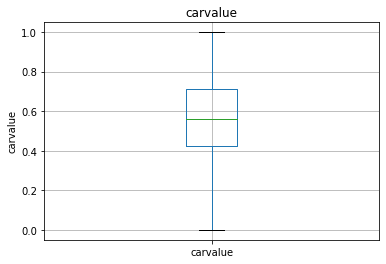

In [41]:
### checking the result on drop on other variables.
conti_features = (feature for feature in X_train 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Removing outliers from yrsempl

In [42]:

Q1 = X_train['yrsempl'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_train['yrsempl'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1



In [43]:
outliers=((X_train['yrsempl'] < (Q1 - 1.5 * IQR)) | (X_train['yrsempl'] > (Q3 + 1.5 * IQR)))
outliers.sum()

105

In [44]:
### changing the outliers to nan ,then removing the nan(s)
X_train['yrsempl'][outliers]  = np.nan
X_train = X_train.dropna()

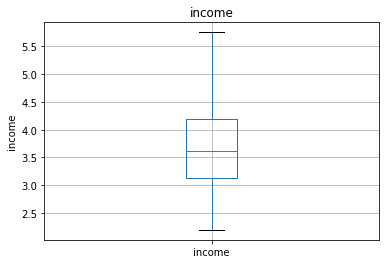

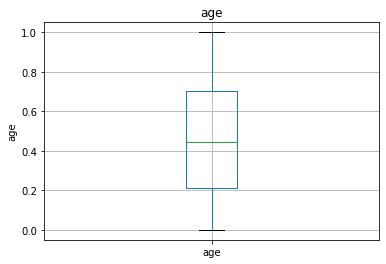

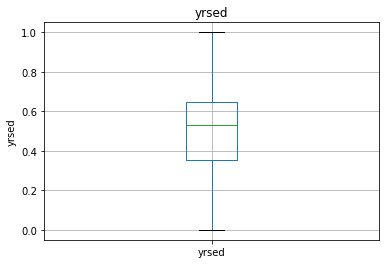

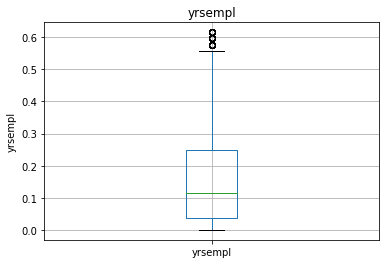

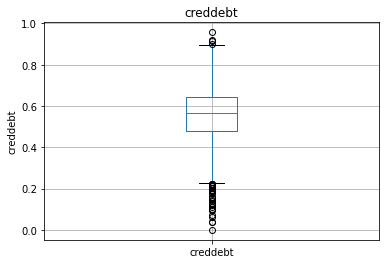

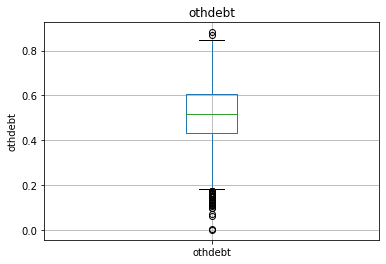

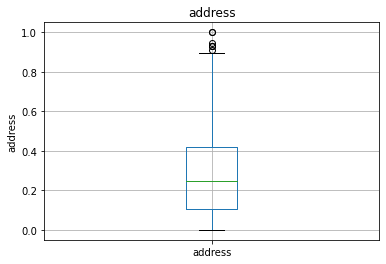

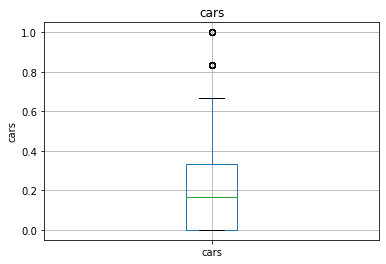

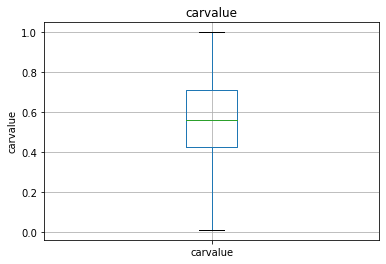

In [45]:
### checking the result on drop on other variables.
conti_features = (feature for feature in X_train 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Removing outliers from creddebt

In [46]:

Q1 = X_train['creddebt'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_train['creddebt'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

In [47]:
outliers=((X_train['creddebt'] < (Q1 - 1.5 * IQR)) | (X_train['creddebt'] > (Q3 + 1.5 * IQR)))
outliers.sum()

38

In [48]:
### changing the outliers to nan ,then removing the nan(s)
X_train['creddebt'][outliers]  = np.nan
X_train =X_train.dropna()

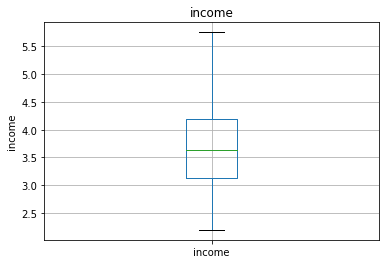

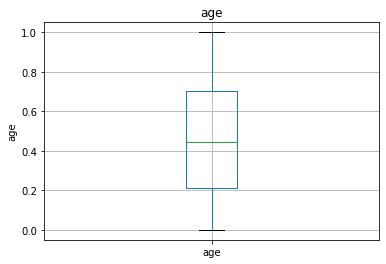

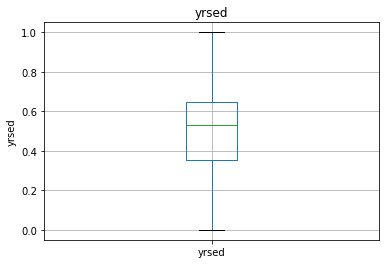

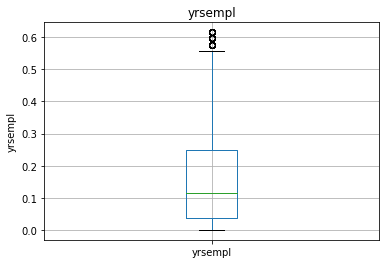

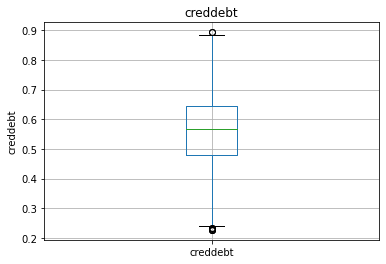

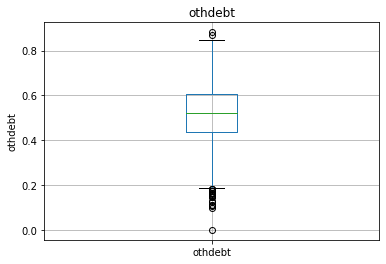

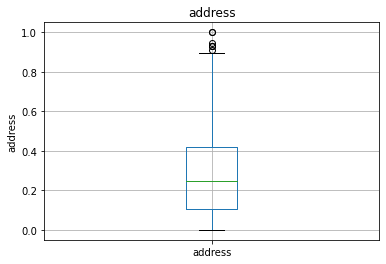

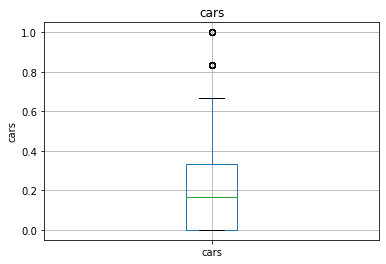

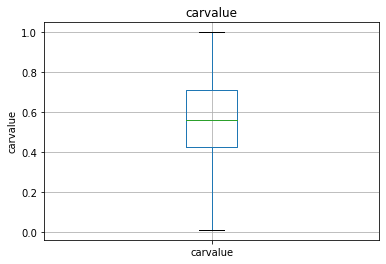

In [49]:
### checking the result on drop on other variables.
conti_features = (feature for feature in X_train 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Removing outliers from othdebt

In [50]:
Q1 = X_train['othdebt'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_train['othdebt'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

In [51]:
outliers=((X_train['othdebt'] < (Q1 - 1.5 * IQR)) | (X_train['othdebt'] > (Q3 + 1.5 * IQR)))
outliers.sum()

22

In [52]:
### changing the outliers to nan ,then removing the nan(s)
X_train['othdebt'][outliers]  = np.nan
X_train = X_train.dropna()

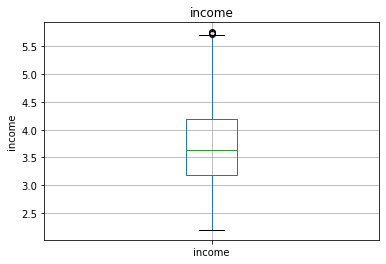

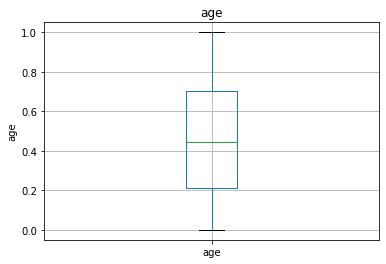

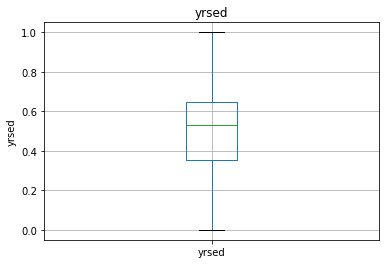

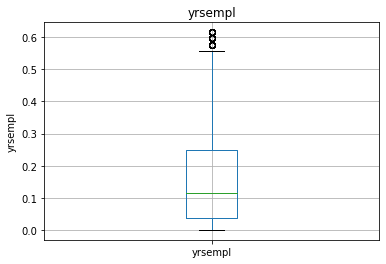

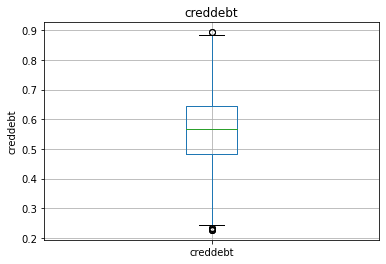

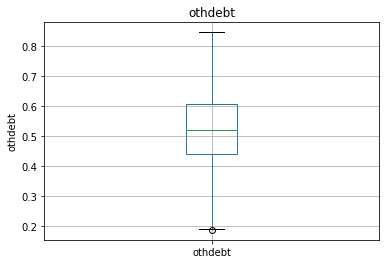

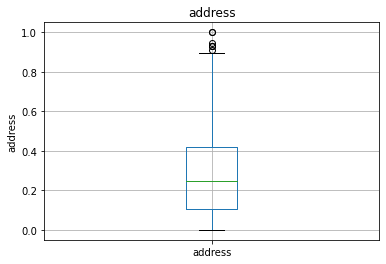

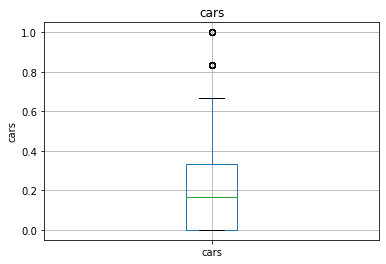

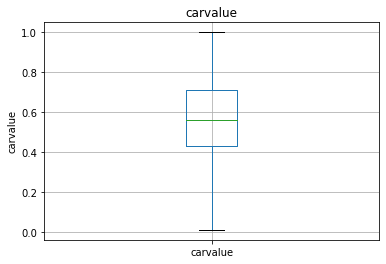

In [53]:
conti_features = (feature for feature in X_train 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Removing Outliers from address

In [54]:
Q1 = X_train['address'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_train['address'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

In [55]:
outliers=((X_train['address'] < (Q1 - 1.5 * IQR)) | (X_train['address'] > (Q3 + 1.5 * IQR)))
outliers.sum()

7

In [56]:
### changing the outliers to nan ,then removing the nan(s)
X_train['address'][outliers]  = np.nan
X_train =X_train.dropna()


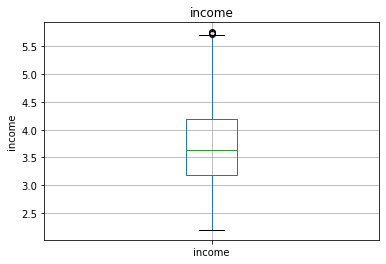

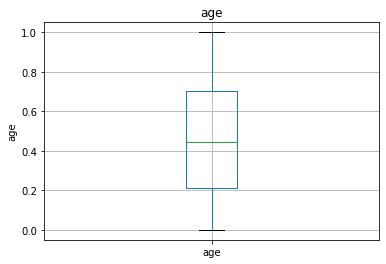

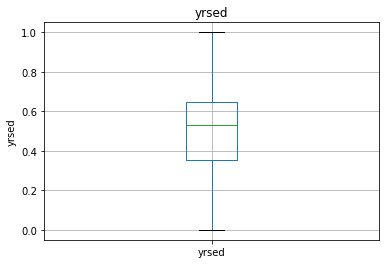

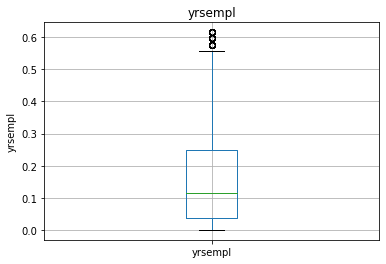

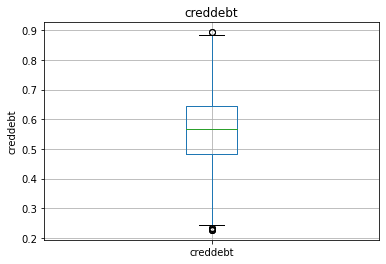

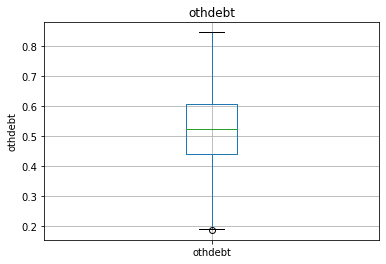

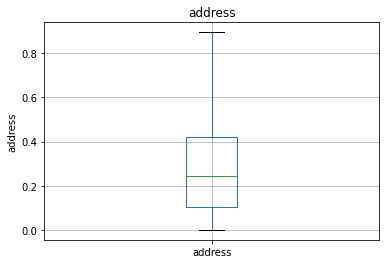

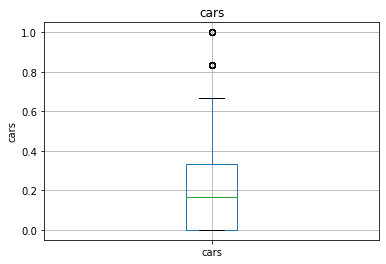

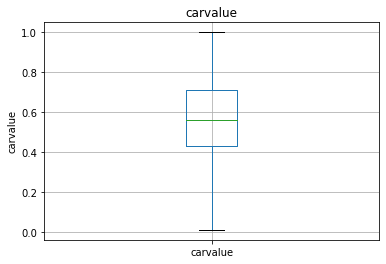

In [57]:
conti_features = (feature for feature in X_train 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Removing outliers from cars

In [58]:
Q1 = X_train['cars'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_train['cars'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

In [59]:
outliers=((X_train['cars'] < (Q1 - 1.5 * IQR)) | (X_train['cars'] > (Q3 + 1.5 * IQR)))
outliers.sum()

42

In [60]:
### changing the outliers to nan ,then removing the nan(s)
X_train['cars'][outliers]  = np.nan
X_train = X_train.dropna()

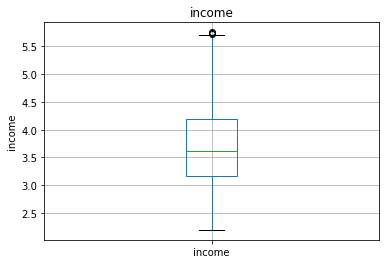

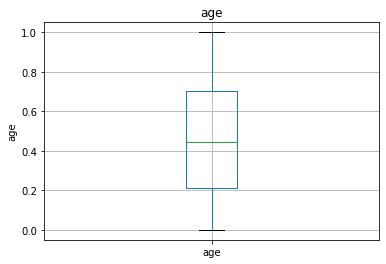

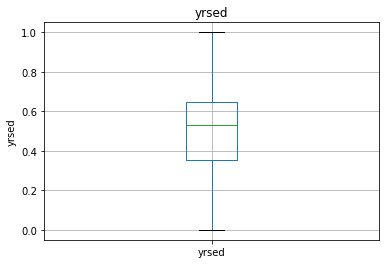

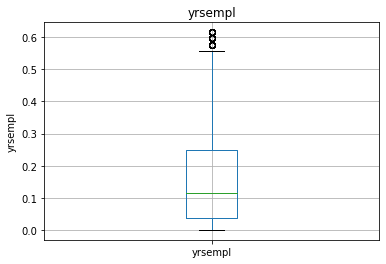

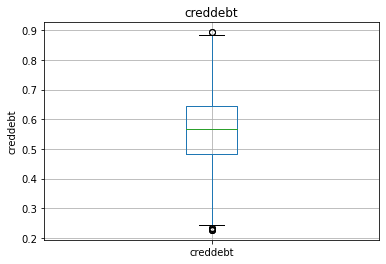

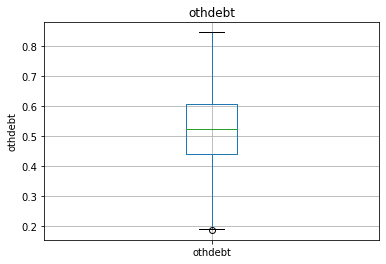

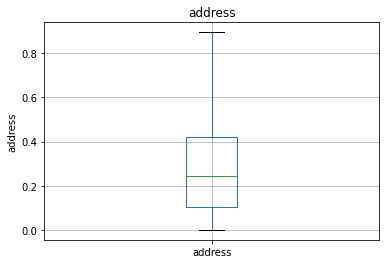

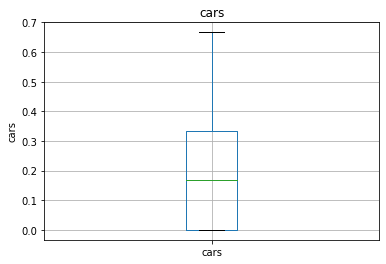

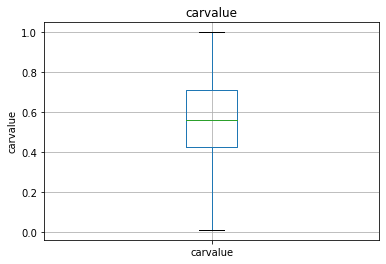

In [61]:
conti_features = (feature for feature in X_train 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [62]:

X_train.to_csv('X_train.csv',index=False)
X_train.shape

(2924, 17)

## Handling Outliers for X_test

In [63]:
X_test_data = pd.read_csv('X_test.csv')
X_test = X_test_data.copy()
X_test.shape

(1353, 17)

In [64]:
Q1 = X_test['income'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_test['income'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

outliers=((X_test['income'] < (Q1 - 1.5 * IQR)) | (X_test['income'] > (Q3 + 1.5 * IQR)))
outliers.sum()

6

In [65]:
### changing the outliers to nan ,then removing the nan(s)
X_test['income'][outliers]  = np.nan
X_test = X_test.dropna()

C:\Users\offic\AppData\Local\Temp/ipykernel_7300/3942169469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['income'][outliers]  = np.nan


In [66]:
Q1 = X_test['yrsempl'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_test['yrsempl'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

outliers=((X_test['yrsempl'] < (Q1 - 1.5 * IQR)) | (X_test['yrsempl'] > (Q3 + 1.5 * IQR)))
outliers.sum()



37

In [67]:
### changing the outliers to nan ,then removing the nan(s)
X_test['yrsempl'][outliers]  = np.nan
X_test = X_test.dropna()

In [68]:
Q1 = X_test['creddebt'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_test['creddebt'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

outliers=((X_test['creddebt'] < (Q1 - 1.5 * IQR)) | (X_test['creddebt'] > (Q3 + 1.5 * IQR)))
outliers.sum()


13

In [69]:
### changing the outliers to nan ,then removing the nan(s)
X_test['creddebt'][outliers]  = np.nan
X_test = X_test.dropna()

In [70]:
Q1 = X_test['othdebt'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_test['othdebt'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

outliers=((X_test['othdebt'] < (Q1 - 1.5 * IQR)) | (X_test['othdebt'] > (Q3 + 1.5 * IQR)))
outliers.sum()


10

In [71]:
### changing the outliers to nan ,then removing the nan(s)
X_test['othdebt'][outliers]  = np.nan
X_test = X_test.dropna()

In [72]:
Q1 = X_test['address'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_test['address'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

outliers=((X_test['address'] < (Q1 - 1.5 * IQR)) | (X_test['address'] > (Q3 + 1.5 * IQR)))
outliers.sum()


15

In [73]:
### changing the outliers to nan ,then removing the nan(s)
X_test['address'][outliers]  = np.nan
X_test = X_test.dropna()

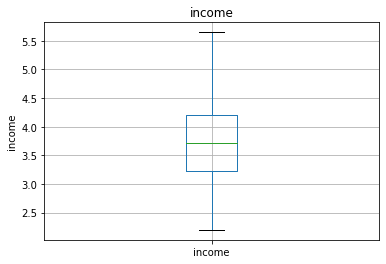

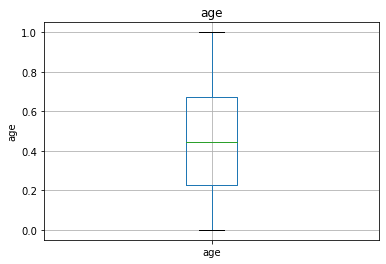

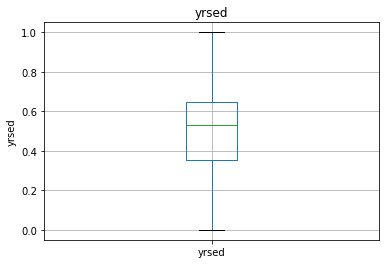

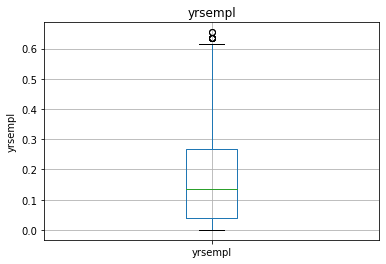

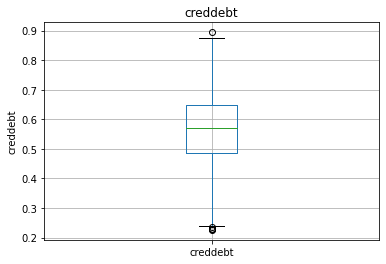

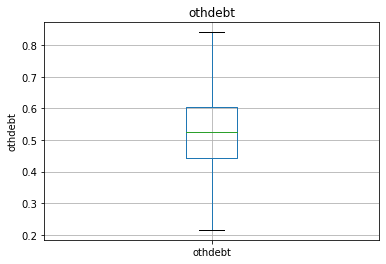

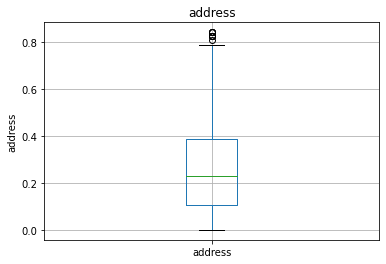

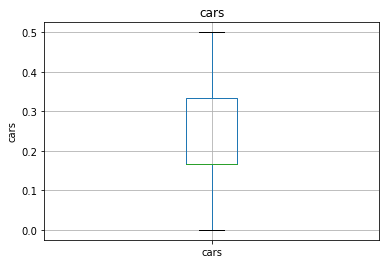

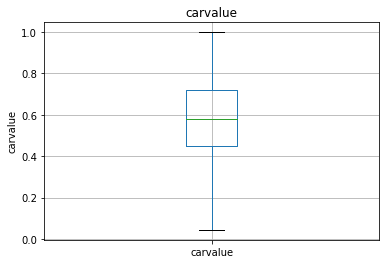

In [80]:
conti_features = (feature for feature in X_test 
                  if 'income' in feature 
                  or 'creddebt' in feature 
                  or'othdebt' in feature
                  or 'carvalue' in feature
                  or 'age' in feature
                  or 'yrsed' in feature
                  or 'yrsempl' in feature
                  or 'address' in feature
                  or 'car' in feature
                 )

for feature in conti_features:
    X_test.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [75]:
Q1 = X_test['cars'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_test['cars'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

outliers=((X_test['cars'] < (Q1 - 1.5 * IQR)) | (X_test['cars'] > (Q3 + 1.5 * IQR)))
outliers.sum()


67

In [76]:
### changing the outliers to nan ,then removing the nan(s)
X_test['cars'][outliers]  = np.nan
X_test = X_test.dropna()

In [77]:
Q1 = X_test['carvalue'].quantile(0.25)
  
# Third quartile (Q3)
Q3 =X_test['carvalue'].quantile(0.75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

outliers=((X_test['carvalue'] < (Q1 - 1.5 * IQR)) | (X_test['carvalue'] > (Q3 + 1.5 * IQR)))
outliers.sum()


1

In [78]:
### changing the outliers to nan ,then removing the nan(s)
X_test['carvalue'][outliers]  = np.nan
X_test = X_test.dropna()

In [79]:

X_test.to_csv('X_test.csv',index=False)
X_test.shape

(1204, 17)

# Now We Are Ready For Feature Selection 